## NOTE: Includes: ##
backyard_flock.csv, 
hpai-wild-birds.csv, 
nst-est2023-pop.xlsx (now "census2023.csv")

In [284]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [285]:
# Read the csv file into a Pandas DataFrame. Rename the 'Date Detected' column to 'Outbreak Date'.

wildbirds_df = pd.read_csv('./data/hpai-wild-birds.csv')
wildbirds_df = wildbirds_df.rename(columns={'Date Detected': 'Outbreak Date'})
wildbirds_df.head()

,State,County,Collection Date,Outbreak Date,HPAI Strain,Bird Species,WOAH Classification,Sampling Method,Submitting Agency
0,South Carolina,Colleton,12/30/2021,1/13/2022,EA H5N1,American wigeon,Wild bird,Hunter harvest,NWDP
1,South Carolina,Colleton,12/30/2021,1/13/2022,EA H5N1,Blue-winged teal,Wild bird,Hunter harvest,NWDP
2,North Carolina,Hyde,12/30/2021,1/12/2022,EA H5N1,Northern shoveler,Wild bird,Hunter harvest,NWDP
3,North Carolina,Hyde,1/8/2022,1/20/2022,EA H5N1,American wigeon,Wild bird,Hunter harvest,NWDP
4,North Carolina,Hyde,1/8/2022,1/20/2022,EA H5,Gadwall,Wild bird,Hunter harvest,NWDP


In [286]:
# Drop the 'Submitting Agency' column.

wildbirds_df = wildbirds_df.drop(columns = ['Submitting Agency'])
wildbirds_df.head()

,State,County,Collection Date,Outbreak Date,HPAI Strain,Bird Species,WOAH Classification,Sampling Method
0,South Carolina,Colleton,12/30/2021,1/13/2022,EA H5N1,American wigeon,Wild bird,Hunter harvest
1,South Carolina,Colleton,12/30/2021,1/13/2022,EA H5N1,Blue-winged teal,Wild bird,Hunter harvest
2,North Carolina,Hyde,12/30/2021,1/12/2022,EA H5N1,Northern shoveler,Wild bird,Hunter harvest
3,North Carolina,Hyde,1/8/2022,1/20/2022,EA H5N1,American wigeon,Wild bird,Hunter harvest
4,North Carolina,Hyde,1/8/2022,1/20/2022,EA H5,Gadwall,Wild bird,Hunter harvest


In [287]:
# Read the csv file into a Pandas DataFrame. Clean up the data.

census_df = pd.read_csv('./data/census2023.csv')
census_df.rename(columns={"Unnamed: 0": "State"}, inplace=True)
census_df["State"] = census_df['State'].str.lstrip('.')
census_df.head()

,State,2020,2021,2022,2023
0,Alabama,"5,031,864","5,050,380","5,073,903","5,108,468"
1,Alaska,"732,964","734,923","733,276","733,406"
2,Arizona,"7,186,683","7,272,487","7,365,684","7,431,344"
3,Arkansas,"3,014,348","3,028,443","3,046,404","3,067,732"
4,California,"39,503,200","39,145,060","39,040,616","38,965,193"


In [288]:
# Read the csv file into a Pandas DataFrame.

backyardflock_df = pd.read_csv('./data/backyard_flock.csv')
backyardflock_df.head()

,County,State,Outbreak Date,Flock Type,Flock Size
0,Ottawa,Michigan,12-31-2024,Commercial Turkey Meat Bird,29400
1,Riverside,California,12-31-2024,Commercial Table Egg Layer,181300
2,Spartanburg,South Carolina,12-31-2024,Commercial Upland Gamebird Producer,920
3,Butte,California,12-31-2024,WOAH Non-Poultry,70
4,Miner,South Dakota,12-31-2024,WOAH Poultry,1500


In [289]:
# Concatenate the dataframes.

df_combined = pd.concat([wildbirds_df, census_df, backyardflock_df], ignore_index=True)
df_combined.head(1000000)

,State,County,Collection Date,Outbreak Date,HPAI Strain,Bird Species,WOAH Classification,Sampling Method,2020,2021,2022,2023,Flock Type,Flock Size
0,South Carolina,Colleton,12/30/2021,1/13/2022,EA H5N1,American wigeon,Wild bird,Hunter harvest,NaN,NaN,NaN,NaN,NaN,NaN
1,South Carolina,Colleton,12/30/2021,1/13/2022,EA H5N1,Blue-winged teal,Wild bird,Hunter harvest,NaN,NaN,NaN,NaN,NaN,NaN
2,North Carolina,Hyde,12/30/2021,1/12/2022,EA H5N1,Northern shoveler,Wild bird,Hunter harvest,NaN,NaN,NaN,NaN,NaN,NaN
3,North Carolina,Hyde,1/8/2022,1/20/2022,EA H5N1,American wigeon,Wild bird,Hunter harvest,NaN,NaN,NaN,NaN,NaN,NaN
4,North Carolina,Hyde,1/8/2022,1/20/2022,EA H5,Gadwall,Wild bird,Hunter harvest,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13228,California,Butte,NaN,01-03-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commercial Raised for Release Upland Game Bird,44700.0
13229,California,Merced,NaN,01-03-2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commercial Table Egg Layer,764300.0
13230,California,Sonoma,NaN,01-03-2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commercial Broiler Production,77900.0
13231,California,Merced,NaN,01-03-2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commercial Broiler Production,534800.0


In [290]:
# Clean up the data.

df_combined.drop(columns=['Collection Date', 'Sampling Method'], inplace=True)
df_combined.dropna(subset=['County'], inplace=True)
df_combined['Outbreak Date'] = pd.to_datetime(df_combined['Outbreak Date'], format='mixed')

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13181 entries, 0 to 13232
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   State                13181 non-null  object        
 1   County               13181 non-null  object        
 2   Outbreak Date        13158 non-null  datetime64[ns]
 3   HPAI Strain          11626 non-null  object        
 4   Bird Species         11627 non-null  object        
 5   WOAH Classification  11627 non-null  object        
 6   2020                 0 non-null      object        
 7   2021                 0 non-null      object        
 8   2022                 0 non-null      object        
 9   2023                 0 non-null      object        
 10  Flock Type           1554 non-null   object        
 11  Flock Size           1554 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 1.3+ MB


In [291]:
# Encode some of the data with LabelEncoder.

label_encoder = LabelEncoder()

birdflu_data_encoded = df_combined.copy()

columns_to_encode = ['County', 'Outbreak Date', 'HPAI Strain', 'Bird Species', 
                     'WOAH Classification', '2020', '2021', '2022', '2023', 'Flock Type']


for column in columns_to_encode:
    birdflu_data_encoded[column] = label_encoder.fit_transform(birdflu_data_encoded[column])

birdflu_data_encoded.head(10)


,State,County,Outbreak Date,HPAI Strain,Bird Species,WOAH Classification,2020,2021,2022,2023,Flock Type,Flock Size
0,South Carolina,204,1,2,8,2,0,0,0,0,23,NaN
1,South Carolina,204,1,2,31,2,0,0,0,0,23,NaN
2,North Carolina,428,0,2,141,2,0,0,0,0,23,NaN
3,North Carolina,428,3,2,8,2,0,0,0,0,23,NaN
4,North Carolina,428,3,0,85,2,0,0,0,0,23,NaN
5,North Carolina,428,3,0,85,2,0,0,0,0,23,NaN
6,North Carolina,711,3,2,8,2,0,0,0,0,23,NaN
7,North Carolina,711,3,0,8,2,0,0,0,0,23,NaN
8,North Carolina,711,3,0,127,2,0,0,0,0,23,NaN
9,North Carolina,711,3,2,85,2,0,0,0,0,23,NaN


In [292]:
# Check the data dataframe.

birdflu_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13181 entries, 0 to 13232
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                13181 non-null  object 
 1   County               13181 non-null  int32  
 2   Outbreak Date        13181 non-null  int64  
 3   HPAI Strain          13181 non-null  int32  
 4   Bird Species         13181 non-null  int32  
 5   WOAH Classification  13181 non-null  int32  
 6   2020                 13181 non-null  int32  
 7   2021                 13181 non-null  int32  
 8   2022                 13181 non-null  int32  
 9   2023                 13181 non-null  int32  
 10  Flock Type           13181 non-null  int32  
 11  Flock Size           1554 non-null   float64
dtypes: float64(1), int32(9), int64(1), object(1)
memory usage: 875.3+ KB


In [293]:
# Replace NaN with Mean using SimpleImputer.

from sklearn.impute import SimpleImputer

# Replace NaN with Mean.
imputer = SimpleImputer(strategy="mean")
birdflu_data_encoded["Flock Size"] = imputer.fit_transform(birdflu_data_encoded[["Flock Size"]])

# Alternative: Use Median.
# birdflu_data_encoded["Flock Size"] = SimpleImputer(strategy="median").fit_transform(birdflu_data_encoded[["Flock Size"]])

birdflu_data_encoded

,State,County,Outbreak Date,HPAI Strain,Bird Species,WOAH Classification,2020,2021,2022,2023,Flock Type,Flock Size
0,South Carolina,204,1,2,8,2,0,0,0,0,23,101528.089447
1,South Carolina,204,1,2,31,2,0,0,0,0,23,101528.089447
2,North Carolina,428,0,2,141,2,0,0,0,0,23,101528.089447
3,North Carolina,428,3,2,8,2,0,0,0,0,23,101528.089447
4,North Carolina,428,3,0,85,2,0,0,0,0,23,101528.089447
...,...,...,...,...,...,...,...,...,...,...,...,...
13228,California,124,616,12,231,3,0,0,0,0,7,44700.000000
13229,California,593,429,12,231,3,0,0,0,0,10,764300.000000
13230,California,886,429,12,231,3,0,0,0,0,4,77900.000000
13231,California,593,429,12,231,3,0,0,0,0,4,534800.000000


In [294]:
# Split the data into features and target.

y = birdflu_data_encoded['State']
X = birdflu_data_encoded.drop(columns=['State'], axis=1)

In [295]:
# Split into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale the data.

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [296]:
# Train the Random Forest model with 100 trees.

clf = RandomForestClassifier(random_state=42, n_estimators=100).fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test)

# Evaluate the model.

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print("Accuracy:", accuracy_score(y_test, y_pred))

c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training Score: 0.9998988366211431
Testing Score: 0.7078276699029126
Accuracy: 0.01183252427184466


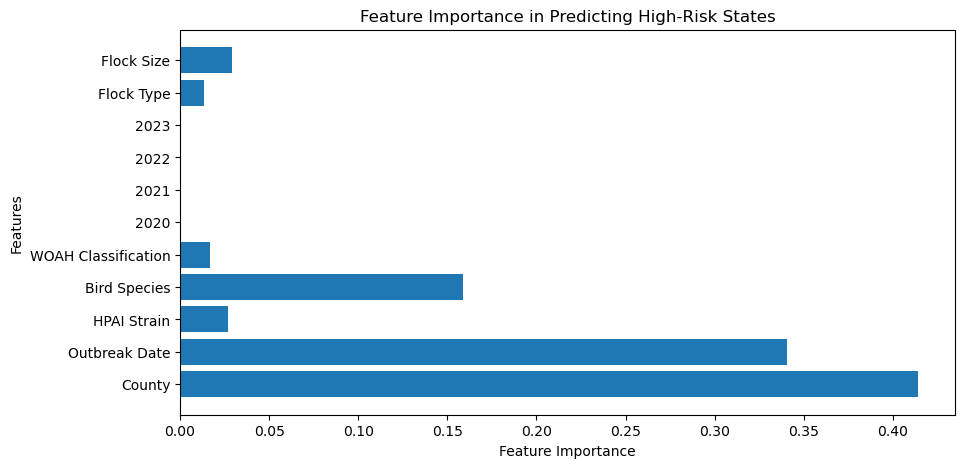

In [297]:
# Plot feature importance.

plt.figure(figsize=(10, 5))
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting High-Risk States")
plt.show()


In [298]:
# List the top 5 most important features.

importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:5]

[(0.41417644740427295, 'County'),
 (0.3408383343098782, 'Outbreak Date'),
 (0.15866327149788256, 'Bird Species'),
 (0.02900081777551681, 'Flock Size'),
 (0.027006951220224805, 'HPAI Strain')]

In [299]:
# Train the Logistic Regression model.

logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)

# Evaluate the model.

print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")

Training Data Score: 0.06555386949924127
Testing Data Score: 0.06674757281553398


c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [300]:
# Make predictions.

predictions = logistic_regression_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame.

results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
results_df

,Prediction,Actual
316,California,Georgia
108,California,New Hampshire
11361,California,Iowa
4217,California,Florida
5123,California,Louisiana
...,...,...
12016,California,California
5191,California,Pennsylvania
5390,California,Colorado
860,California,Minnesota
